### Тема: Предобработка данных: перевод категориальных признаков в числовые.

#### Цель работы

Познакомиться со способами замещения категориальных признаков на числовые.  

#### Задания для выполнения:

0. Загрузите датасет для предсказании арендной платы в зависимости от ряда признаков. Убедитесь, что в датасете нет пропущенных значений. Посмотрите размер датасета. 
Поработайте с категориальными признаками:

1. Убедитесь в том, что столбец `Area Locality` является столбцом с уникальными значениями, удалите его.
2. Сделайте так, чтобы признаки `Area Type` и `Point of Contact` имели только по два значения. Для этого удалите строки с редко встречающимся третьим значением. Замените оставшиеся значения на `0` и `1`. 
3. Определите, сколько значений имеет признак `City`, а сколько `Tenant Preferred`. Сделайте из этих признаков dummy переменные, т.е. замените каждый признак на такое количество признаков, сколько значений он принимает, где в каждом новом признаке на месте его значения стоят единицы, а остальные - нули. После этого по одному из столбцов удалите. Присоедините полученные столбцы к исходному датафрейму, а столбцы `City` и `Tenant Preferred` удалите.
4. Замените признак `Furnishing Status` -"статус мебелировки" на числовой признак следующим образом. Замените статус "Без мебели" на значение 0, "частичная мебелировка" на 1 и "с мебелью" на значение 2.
5. В дате `Posted On` оставьте только номер месяца, в котором размещено объявление о сдаче в аренду.
6. Превратите признак `Floor` в два признака: `Floor_number`- номер этажа, на котором находится квартира (подвалы обозначьте числом `0`) и `Total_floors`- общее количество этажей в доме, в котором сдаётся квартира. Полученные столбцы переведите в тип int.
7. Сохраните полученный датасет и выведете его.
8. Постройте по получившемуся набору данных простую модель машинного обучения и оцените ее эффективность.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

__0. Загрузите датасет для предсказании арендной платы в зависимости от ряда признаков. Убедитесь, что в датасете нет пропущенных значений. Посмотрите размер датасета. 
Поработайте с категориальными признаками:__

Загрузите датасет для предсказании арендной платы в зависимости от ряда признаков

In [2]:
dataset = pd.read_csv('House_Rent_Dataset.csv', parse_dates=['Posted On'])
dataset.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


 Убедитесь, что в датасете нет пропущенных значений.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4746 non-null   datetime64[ns]
 1   BHK                4746 non-null   int64         
 2   Rent               4746 non-null   int64         
 3   Size               4746 non-null   int64         
 4   Floor              4746 non-null   object        
 5   Area Type          4746 non-null   object        
 6   Area Locality      4746 non-null   object        
 7   City               4746 non-null   object        
 8   Furnishing Status  4746 non-null   object        
 9   Tenant Preferred   4746 non-null   object        
 10  Bathroom           4746 non-null   int64         
 11  Point of Contact   4746 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 445.1+ KB


In [4]:
dataset.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

 Посмотрите размер датасета.

In [5]:
dataset.shape

(4746, 12)

__1. Убедитесь в том, что столбец Area Locality является столбцом с уникальными значениями, удалите его.__

In [6]:
dataset['Area Locality'].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

In [7]:
len(dataset['Area Locality'].unique())

2235

In [8]:
dataset.describe(include=['O'])

,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
count,4746,4746,4746,4746,4746,4746,4746
unique,480,3,2235,6,3,3,3
top,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,Contact Owner
freq,379,2446,37,972,2251,3444,3216


In [9]:
dataset.drop(columns=['Area Locality'], inplace=True)
dataset.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


__2. Сделайте так, чтобы признаки Area Type и Point of Contact имели только по два значения. Для этого удалите строки с редко встречающимся третьим значением. Замените оставшиеся значения на 0 и 1.__

***Area Type***

In [10]:
dataset['Area Type'].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

In [11]:
dataset.drop(dataset[dataset['Area Type'] == 'Built Area'].index, inplace=True)

In [12]:
dataset['Area Type'].value_counts()

Super Area     2446
Carpet Area    2298
Name: Area Type, dtype: int64

In [13]:
area_type = pd.get_dummies(dataset['Area Type'], drop_first=True)
area_type.head()

,Super Area
0,1
1,1
2,1
3,1
4,0


***Point of Contact***

In [14]:
dataset['Point of Contact'].value_counts()

Contact Owner      3214
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64

In [15]:
dataset.drop(dataset[dataset['Point of Contact'] == 'Contact Builder'].index, inplace=True)

In [16]:
dataset['Point of Contact'].value_counts()

Contact Owner    3214
Contact Agent    1529
Name: Point of Contact, dtype: int64

In [17]:
point_of_contact = pd.get_dummies(dataset['Point of Contact'], drop_first=True)
point_of_contact.head(10)

,Contact Owner
0,1
1,1
2,1
3,1
4,1
5,1
6,0
7,0
8,0
9,1


In [18]:
dataset = pd.concat([dataset, area_type, point_of_contact], axis=1)
dataset.drop(columns=['Area Type', 'Point of Contact'], inplace=True)
dataset.head()

,Posted On,BHK,Rent,Size,Floor,City,Furnishing Status,Tenant Preferred,Bathroom,Super Area,Contact Owner
0,2022-05-18,2.0,10000.0,1100.0,Ground out of 2,Kolkata,Unfurnished,Bachelors/Family,2.0,1,1.0
1,2022-05-13,2.0,20000.0,800.0,1 out of 3,Kolkata,Semi-Furnished,Bachelors/Family,1.0,1,1.0
2,2022-05-16,2.0,17000.0,1000.0,1 out of 3,Kolkata,Semi-Furnished,Bachelors/Family,1.0,1,1.0
3,2022-07-04,2.0,10000.0,800.0,1 out of 2,Kolkata,Unfurnished,Bachelors/Family,1.0,1,1.0
4,2022-05-09,2.0,7500.0,850.0,1 out of 2,Kolkata,Unfurnished,Bachelors,1.0,0,1.0


__3. Определите, сколько значений имеет признак City, а сколько Tenant Preferred. Сделайте из этих признаков dummy переменные, т.е. замените каждый признак на такое количество признаков, сколько значений он принимает, где в каждом новом признаке на месте его значения стоят единицы, а остальные - нули. После этого по одному из столбцов удалите. Присоедините полученные столбцы к исходному датафрейму, а столбцы City и Tenant Preferred удалите.__

In [19]:
dataset['City'].value_counts()

Mumbai       972
Chennai      890
Bangalore    886
Hyderabad    866
Delhi        605
Kolkata      524
Name: City, dtype: int64

In [20]:
dataset['Tenant Preferred'].value_counts()

Bachelors/Family    3441
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

In [21]:
city = pd.get_dummies(dataset['City'], drop_first=True)
city.head()

,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [22]:
tenant_preferred = pd.get_dummies(dataset['Tenant Preferred'], drop_first=True)
tenant_preferred.head()

,Bachelors/Family,Family
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0


In [23]:
dataset = pd.concat([dataset, tenant_preferred, city], axis=1)
dataset.drop(columns=['City', 'Tenant Preferred'], inplace=True)
dataset.head()

,Posted On,BHK,Rent,Size,Floor,Furnishing Status,Bathroom,Super Area,Contact Owner,Bachelors/Family,Family,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,2022-05-18,2.0,10000.0,1100.0,Ground out of 2,Unfurnished,2.0,1,1.0,1,0,0,0,0,1,0
1,2022-05-13,2.0,20000.0,800.0,1 out of 3,Semi-Furnished,1.0,1,1.0,1,0,0,0,0,1,0
2,2022-05-16,2.0,17000.0,1000.0,1 out of 3,Semi-Furnished,1.0,1,1.0,1,0,0,0,0,1,0
3,2022-07-04,2.0,10000.0,800.0,1 out of 2,Unfurnished,1.0,1,1.0,1,0,0,0,0,1,0
4,2022-05-09,2.0,7500.0,850.0,1 out of 2,Unfurnished,1.0,0,1.0,0,0,0,0,0,1,0


__4. Замените признак Furnishing Status -"статус мебелировки" на числовой признак следующим образом. Замените статус "Без мебели" на значение 0, "частичная мебелировка" на 1 и "с мебелью" на значение 2.__

In [24]:
dataset['Furnishing Status'].value_counts()

Semi-Furnished    2251
Unfurnished       1813
Furnished          679
Name: Furnishing Status, dtype: int64

In [25]:
dataset['Furnishing Status'] = dataset['Furnishing Status'].replace({'Unfurnished': 0,
                                                                     'Semi-Furnished': 1,
                                                                     'Furnished': 2})
dataset.head()

,Posted On,BHK,Rent,Size,Floor,Furnishing Status,Bathroom,Super Area,Contact Owner,Bachelors/Family,Family,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,2022-05-18,2.0,10000.0,1100.0,Ground out of 2,0.0,2.0,1,1.0,1,0,0,0,0,1,0
1,2022-05-13,2.0,20000.0,800.0,1 out of 3,1.0,1.0,1,1.0,1,0,0,0,0,1,0
2,2022-05-16,2.0,17000.0,1000.0,1 out of 3,1.0,1.0,1,1.0,1,0,0,0,0,1,0
3,2022-07-04,2.0,10000.0,800.0,1 out of 2,0.0,1.0,1,1.0,1,0,0,0,0,1,0
4,2022-05-09,2.0,7500.0,850.0,1 out of 2,0.0,1.0,0,1.0,0,0,0,0,0,1,0


In [26]:
dataset['Furnishing Status'].value_counts()

1.0    2251
0.0    1813
2.0     679
Name: Furnishing Status, dtype: int64

__5. В дате Posted On оставьте только номер месяца, в котором размещено объявление о сдаче в аренду..__

In [27]:
dataset['Posted On'] = dataset['Posted On'].dt.month
dataset.head()

,Posted On,BHK,Rent,Size,Floor,Furnishing Status,Bathroom,Super Area,Contact Owner,Bachelors/Family,Family,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,5.0,2.0,10000.0,1100.0,Ground out of 2,0.0,2.0,1,1.0,1,0,0,0,0,1,0
1,5.0,2.0,20000.0,800.0,1 out of 3,1.0,1.0,1,1.0,1,0,0,0,0,1,0
2,5.0,2.0,17000.0,1000.0,1 out of 3,1.0,1.0,1,1.0,1,0,0,0,0,1,0
3,7.0,2.0,10000.0,800.0,1 out of 2,0.0,1.0,1,1.0,1,0,0,0,0,1,0
4,5.0,2.0,7500.0,850.0,1 out of 2,0.0,1.0,0,1.0,0,0,0,0,0,1,0


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4744 entries, 0 to 4745
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4743 non-null   float64
 1   BHK                4743 non-null   float64
 2   Rent               4743 non-null   float64
 3   Size               4743 non-null   float64
 4   Floor              4743 non-null   object 
 5   Furnishing Status  4743 non-null   float64
 6   Bathroom           4743 non-null   float64
 7   Super Area         4744 non-null   uint8  
 8   Contact Owner      4743 non-null   float64
 9   Bachelors/Family   4744 non-null   uint8  
 10  Family             4744 non-null   uint8  
 11  Chennai            4744 non-null   uint8  
 12  Delhi              4744 non-null   uint8  
 13  Hyderabad          4744 non-null   uint8  
 14  Kolkata            4744 non-null   uint8  
 15  Mumbai             4744 non-null   uint8  
dtypes: float64(7), object(1)

__6. Превратите признак Floor в два признака: Floor_number- номер этажа, на котором находится квартира (подвалы обозначьте числом 0) и Total_floors- общее количество этажей в доме, в котором сдаётся квартира. Полученные столбцы переведите в тип int.__

In [29]:
dataset['Floor_number'] = dataset['Floor'].str.split(' out of ', expand=True)[0]
dataset['Total_floors'] = dataset['Floor'].str.split(' out of ', expand=True)[1]
dataset.head()

,Posted On,BHK,Rent,Size,Floor,Furnishing Status,Bathroom,Super Area,Contact Owner,Bachelors/Family,Family,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Floor_number,Total_floors
0,5.0,2.0,10000.0,1100.0,Ground out of 2,0.0,2.0,1,1.0,1,0,0,0,0,1,0,Ground,2
1,5.0,2.0,20000.0,800.0,1 out of 3,1.0,1.0,1,1.0,1,0,0,0,0,1,0,1,3
2,5.0,2.0,17000.0,1000.0,1 out of 3,1.0,1.0,1,1.0,1,0,0,0,0,1,0,1,3
3,7.0,2.0,10000.0,800.0,1 out of 2,0.0,1.0,1,1.0,1,0,0,0,0,1,0,1,2
4,5.0,2.0,7500.0,850.0,1 out of 2,0.0,1.0,0,1.0,0,0,0,0,0,1,0,1,2


In [30]:
dataset.drop(columns=['Floor'], inplace=True)

In [31]:
dataset['Floor_number'].value_counts()

1                 1159
2                  945
Ground             927
3                  512
4                  272
5                  163
6                   93
7                   74
10                  67
8                   66
9                   65
12                  47
11                  43
15                  41
14                  34
18                  26
Upper Basement      23
17                  22
16                  21
19                  16
13                  15
20                  12
25                  12
Lower Basement      11
23                   9
24                   6
21                   6
30                   5
34                   4
28                   4
35                   3
65                   3
22                   3
26                   3
32                   3
60                   3
27                   3
40                   2
53                   2
45                   2
36                   2
48                   2
29                   1
49         

In [32]:
dataset['Floor_number'] = dataset['Floor_number'].replace({'Ground': 0,
                                                             'Upper Basement': 0,
                                                             'Lower Basement': 0}) # LabelEncoder
dataset['Floor_number'].value_counts()

1     1159
0      961
2      945
3      512
4      272
5      163
6       93
7       74
10      67
8       66
9       65
12      47
11      43
15      41
14      34
18      26
17      22
16      21
19      16
13      15
20      12
25      12
23       9
24       6
21       6
30       5
34       4
28       4
35       3
27       3
22       3
32       3
26       3
65       3
60       3
45       2
36       2
48       2
40       2
53       2
44       1
41       1
46       1
37       1
33       1
50       1
39       1
43       1
29       1
49       1
47       1
76       1
Name: Floor_number, dtype: int64

In [33]:
dataset.isna().sum()

Posted On            1
BHK                  1
Rent                 1
Size                 1
Furnishing Status    1
Bathroom             1
Super Area           0
Contact Owner        1
Bachelors/Family     0
Family               0
Chennai              0
Delhi                0
Hyderabad            0
Kolkata              0
Mumbai               0
Floor_number         1
Total_floors         5
dtype: int64

In [34]:
dataset = dataset.dropna()

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4739 entries, 0 to 4745
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4739 non-null   float64
 1   BHK                4739 non-null   float64
 2   Rent               4739 non-null   float64
 3   Size               4739 non-null   float64
 4   Furnishing Status  4739 non-null   float64
 5   Bathroom           4739 non-null   float64
 6   Super Area         4739 non-null   uint8  
 7   Contact Owner      4739 non-null   float64
 8   Bachelors/Family   4739 non-null   uint8  
 9   Family             4739 non-null   uint8  
 10  Chennai            4739 non-null   uint8  
 11  Delhi              4739 non-null   uint8  
 12  Hyderabad          4739 non-null   uint8  
 13  Kolkata            4739 non-null   uint8  
 14  Mumbai             4739 non-null   uint8  
 15  Floor_number       4739 non-null   object 
 16  Total_floors       4739 

In [36]:
dataset['Floor_number'] = dataset['Floor_number'].astype(int)
dataset['Total_floors'] = dataset['Total_floors'].astype(int)
dataset['Posted On'] = dataset['Posted On'].astype(int)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4739 entries, 0 to 4745
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4739 non-null   int32  
 1   BHK                4739 non-null   float64
 2   Rent               4739 non-null   float64
 3   Size               4739 non-null   float64
 4   Furnishing Status  4739 non-null   float64
 5   Bathroom           4739 non-null   float64
 6   Super Area         4739 non-null   uint8  
 7   Contact Owner      4739 non-null   float64
 8   Bachelors/Family   4739 non-null   uint8  
 9   Family             4739 non-null   uint8  
 10  Chennai            4739 non-null   uint8  
 11  Delhi              4739 non-null   uint8  
 12  Hyderabad          4739 non-null   uint8  
 13  Kolkata            4739 non-null   uint8  
 14  Mumbai             4739 non-null   uint8  
 15  Floor_number       4739 non-null   int32  
 16  Total_floors       4739 

__7. Сохраните полученный датасет и выведете его.__

In [37]:
dataset

,Posted On,BHK,Rent,Size,Furnishing Status,Bathroom,Super Area,Contact Owner,Bachelors/Family,Family,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Floor_number,Total_floors
0,5,2.0,10000.0,1100.0,0.0,2.0,1,1.0,1,0,0,0,0,1,0,0,2
1,5,2.0,20000.0,800.0,1.0,1.0,1,1.0,1,0,0,0,0,1,0,1,3
2,5,2.0,17000.0,1000.0,1.0,1.0,1,1.0,1,0,0,0,0,1,0,1,3
3,7,2.0,10000.0,800.0,0.0,1.0,1,1.0,1,0,0,0,0,1,0,1,2
4,5,2.0,7500.0,850.0,0.0,1.0,0,1.0,0,0,0,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,5,2.0,15000.0,1000.0,1.0,2.0,0,1.0,1,0,0,0,1,0,0,3,5
4742,5,3.0,29000.0,2000.0,1.0,3.0,1,1.0,1,0,0,0,1,0,0,1,4
4743,7,3.0,35000.0,1750.0,1.0,3.0,0,0.0,1,0,0,0,1,0,0,3,5
4744,7,3.0,45000.0,1500.0,1.0,2.0,0,0.0,0,1,0,0,1,0,0,23,34


__8. Постройте по получившемуся набору данных простую модель машинного обучения и оцените ее эффективность.__

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4739 entries, 0 to 4745
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4739 non-null   int32  
 1   BHK                4739 non-null   float64
 2   Rent               4739 non-null   float64
 3   Size               4739 non-null   float64
 4   Furnishing Status  4739 non-null   float64
 5   Bathroom           4739 non-null   float64
 6   Super Area         4739 non-null   uint8  
 7   Contact Owner      4739 non-null   float64
 8   Bachelors/Family   4739 non-null   uint8  
 9   Family             4739 non-null   uint8  
 10  Chennai            4739 non-null   uint8  
 11  Delhi              4739 non-null   uint8  
 12  Hyderabad          4739 non-null   uint8  
 13  Kolkata            4739 non-null   uint8  
 14  Mumbai             4739 non-null   uint8  
 15  Floor_number       4739 non-null   int32  
 16  Total_floors       4739 

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = dataset.drop(columns=['Rent'])
y = dataset['Rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

print("R^2 : ", r2_score(y_test, model.predict(X_test)))
print("MAE :", mean_absolute_error(y_test, model.predict(X_test)))
print("MSE : ", mean_squared_error(y_test, model.predict(X_test)))
print("RMSE:", np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

R^2 :  0.16729267702551787
MAE : 23835.408404501664
MSE :  9981255453.720888
RMSE: 99906.23330764147


Простая модель крайне неэффективно предсказывает цены на аренду.

***Выбросы***

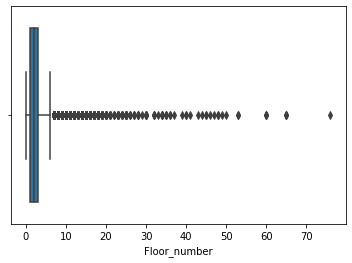

In [44]:
sns.boxplot(data=dataset, x="Floor_number");

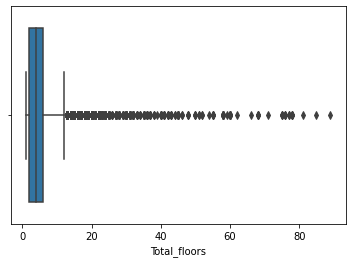

In [45]:
sns.boxplot(data=dataset, x="Total_floors");

In [46]:
q = dataset["Total_floors"].quantile(0.99)

In [ ]:
dataset[dataset["col"] < q]